In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1.2
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8 MB 22 kB/s 
     |████████████████████████████████| 6.6 MB 43.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.0+cu101 which is incompatible.
     |████████████████████████████████| 265 kB 4.4 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp37-cp37m-linux_x86_64.whl size=44117 sha256=99cf0434b9201c74ec03bd3d7da6

In [ ]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2 MB 802 kB/s 
     |████████████████████████████████| 49 kB 3.7 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=e4fa3382fc0cb320257d2f101877294f5af4e62293e7f5e6bb3dae8da123c61f
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
Successfully built fvcore


In [ ]:
pip install -U 'git+https://github.com/facebookresearch/fvcore@4525b814c8bb0f70510e37e68247c958010eb285'

  Cloning https://github.com/facebookresearch/fvcore (to revision 4525b814c8bb0f70510e37e68247c958010eb285) to /tmp/pip-req-build-btkhaq3q
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-btkhaq3q
  Running command git rev-parse -q --verify 'sha^4525b814c8bb0f70510e37e68247c958010eb285'
  Running command git fetch -q https://github.com/facebookresearch/fvcore 4525b814c8bb0f70510e37e68247c958010eb285
  Running command git checkout -q 4525b814c8bb0f70510e37e68247c958010eb285
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=64713 sha256=948674719142500c51f6a6fcc654da1e99620255330336a5a2da2e6574c318ac
  Stored in directory: /root/.cache/pip/wheels/07/6c/15/9d2db8afd0f1fb57704c95724954d2d156aad32f78df0cc130
Successfully built fvcore
  Attempting uninstall: fvcore
    Found existing installation: fvcore 0.1.5.post20211023
    Uninstalling fvcore-0.1.5.post20211023:
      Successfully uninstalled fvcore-0.1.5.post20211023


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

list1 = os.listdir('/content/drive/MyDrive/Clip_2/') # dir is your directory path
number_files = len(list1)
print(number_files)

8459


In [ ]:
import torch, torchvision
import itertools
print(torch.__version__, torch.cuda.is_available())

1.5.0+cu101 True


In [ ]:
import pandas as pd
faces_df = pd.read_csv('/content/drive/MyDrive/Clip_2/ann_Clip2_new2.csv')
faces_df.head()

,filename,width,height,class_name,xmin,ymin,xmax,ymax
0,frame_09772_png.rf.235e8b0aae1b4ae9580fad126a3...,256,256,gru,33,117,65,155
1,frame_09854_png.rf.2384d50374dd15a2fdf5dd60336...,256,256,boss,69,116,124,200
2,frame_02947_png.rf.21dbd7ada7141687f175dc102d8...,256,256,margo,32,145,55,187
3,frame_02947_png.rf.21dbd7ada7141687f175dc102d8...,256,256,agnes,49,92,67,121
4,frame_02947_png.rf.21dbd7ada7141687f175dc102d8...,256,256,edith,117,97,136,114


In [ ]:
print(faces_df.filename.unique().shape[0], faces_df.shape[0])

2795 5084


In [ ]:
classes = faces_df.class_name.unique().tolist()
classes

['gru',
 'boss',
 'margo',
 'agnes',
 'edith',
 'tower',
 'vector',
 'lady',
 'other',
 'hattie',
 'tower3',
 'trainer',
 'tower4',
 'officer',
 'min']

In [ ]:
file_name = faces_df.filename.to_numpy()[1000]
file_name

'frame_03390_png.rf.a41d7c5312eaf754173afd457422933a.jpg'

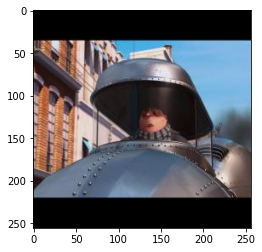

In [ ]:
import cv2
import matplotlib.pyplot as plt 
img = cv2.cvtColor(cv2.imread(f'/content/drive/MyDrive/Clip_2/{file_name}'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

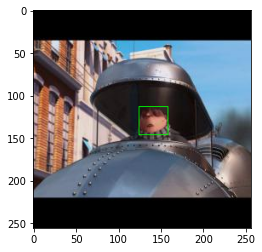

In [ ]:
img1 = cv2.rectangle(img, (faces_df.xmin[1000], faces_df.ymin[1000]), (faces_df.xmax[1000], faces_df.ymax[1000]), (0, 255, 0), 1)
plt.imshow(img1)

In [ ]:
def annotate_image(annotations, resize=True):
  file_name = annotations.filename.to_numpy()[0]
  img = cv2.cvtColor(cv2.imread(f'/content/drive/MyDrive/Clip_2/{file_name}'), cv2.COLOR_BGR2RGB)

  for i, a in annotations.iterrows():    
    cv2.rectangle(img, (a.xmin, a.ymin), (a.xmax, a.ymax), (0, 255, 0), 2)

 
  return img

                                               filename  width  ...  xmax ymax
1912  frame_01549_png.rf.8504fbf72500cfbed9a2fd5f6ff...    256  ...   181  216
1913  frame_01549_png.rf.8504fbf72500cfbed9a2fd5f6ff...    256  ...   230  138
1914  frame_01549_png.rf.8504fbf72500cfbed9a2fd5f6ff...    256  ...   100  124

[3 rows x 8 columns]


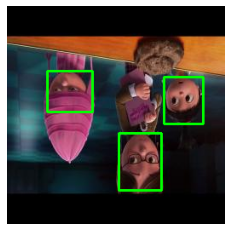

In [ ]:
img_df = faces_df[faces_df.filename == faces_df.filename.unique()[1000]]
img = annotate_image(img_df, resize=False)

plt.imshow(img)
plt.axis('off');
print(img_df)

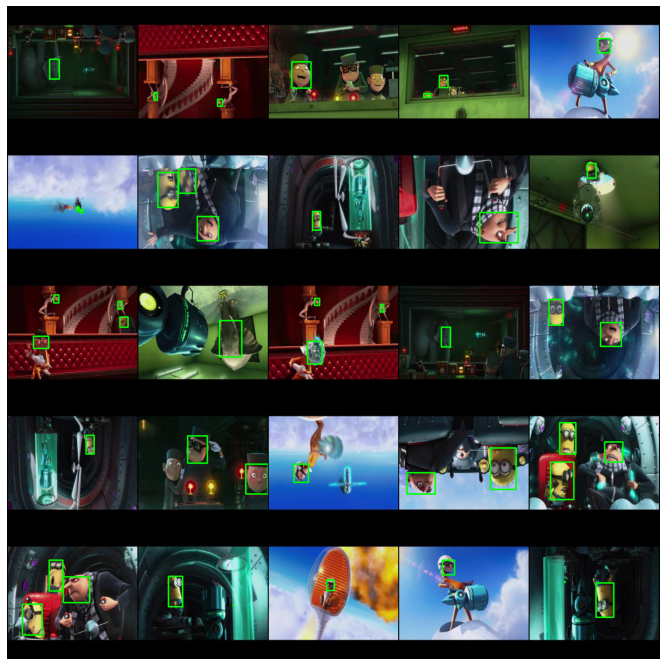

In [ ]:
sample_images = [annotate_image(faces_df[faces_df.filename == f]) for f in faces_df.filename.unique()[2300:2325]]
sample_images = torch.as_tensor(sample_images)

sample_images.shape
sample_images = sample_images.permute(0,3,1,2)

plt.figure(figsize=(24, 12))
grid_img = torchvision.utils.make_grid(sample_images, nrow=5)

plt.imshow(grid_img.permute(1, 2, 0))
plt.axis('off');


In [ ]:
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Clip_2/ann_Clip2_new2.csv')

df = df.sample(frac=1)

IMAGES_PATH = f'/content/drive/MyDrive/Clip_2'

unique_files = df.filename.unique()

train_files = set(np.random.choice(unique_files, int(len(unique_files) * 0.85), replace=False))
train_df = df[df.filename.isin(train_files)]
test_df = df[~df.filename.isin(train_files)]


train_df.head()

,filename,width,height,class_name,xmin,ymin,xmax,ymax
2795,frame_02303_png.rf.ff60a357459d541a97494004047...,256,256,agnes,155,190,174,220
4076,frame_17646_png.rf.af3f95c2fd9ddb4ed88e79a1b36...,256,256,gru,83,116,108,156
744,frame_08274_png.rf.110cf49e2a8eadf4ed7c4e60d4c...,256,256,vector,43,107,86,148
1631,frame_02947_png.rf.71c3482bc170d400163f8432b79...,256,256,agnes,189,135,207,164
1914,frame_01549_png.rf.8504fbf72500cfbed9a2fd5f6ff...,256,256,edith,47,76,100,124


In [ ]:
classes = df.class_name.unique().tolist()
classes

['agnes',
 'gru',
 'vector',
 'edith',
 'tower3',
 'trainer',
 'min',
 'lady',
 'tower',
 'boss',
 'hattie',
 'margo',
 'officer',
 'other',
 'tower4']

In [ ]:
def create_dataset_dicts(df, classes):
  dataset_dicts = []
  for image_id, img_name in enumerate(df.filename.unique()):

    record = {}

    image_df = df[df.filename == img_name]

    file_path = f'{IMAGES_PATH}/{img_name}'
    record["file_name"] = file_path
    record["image_id"] = image_id
    record["height"] = int(image_df.iloc[0].height)
    record["width"] = int(image_df.iloc[0].width)

    objs = []
    for _, row in image_df.iterrows():

      xmin = int(row.xmin)
      ymin = int(row.ymin)
      xmax = int(row.xmax)
      ymax = int(row.ymax)

      poly = [
          (xmin, ymin), (xmax, ymin), 
          (xmax, ymax), (xmin, ymax)
      ]
      poly = list(itertools.chain.from_iterable(poly))

      obj = {
        "bbox": [xmin, ymin, xmax, ymax],
        "bbox_mode": BoxMode.XYXY_ABS,
        "segmentation": [poly],
        "category_id": classes.index(row.class_name),
        "iscrowd": 0
      }
      objs.append(obj)

    record["annotations"] = objs
    dataset_dicts.append(record)
  return dataset_dicts

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.utils.logger import setup_logger
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, build_detection_test_loader 
from detectron2.data.catalog import DatasetCatalog

from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.structures import BoxMode

import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
for d in ["train", "val"]:
  DatasetCatalog.register("faces_" + d, lambda d=d: create_dataset_dicts(train_df if d == "train" else test_df, classes))
  MetadataCatalog.get("faces_" + d).set(thing_classes=classes)

statement_metadata = MetadataCatalog.get("faces_train")

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):
  
  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
cfg = get_cfg()

cfg.merge_from_file(
  model_zoo.get_config_file(
    "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
  )
)

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
  "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
)

In [ ]:
cfg.DATASETS.TRAIN = ("faces_train",)
cfg.DATASETS.TEST = ("faces_val",)
cfg.DATALOADER.NUM_WORKERS = 4

In [ ]:
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05

In [ ]:
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)

cfg.TEST.EVAL_PERIOD = 1000

In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[11/09 17:24:38 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_2d9806.pkl: 431MB [00:40, 10.7MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (60, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (60,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due 

[11/09 17:25:25 d2.engine.train_loop]: Starting training from iteration 0
[11/09 17:27:03 d2.utils.events]:  eta: 1:58:17  iter: 19  total_loss: 4.095  loss_cls: 2.659  loss_box_reg: 0.579  loss_mask: 0.694  loss_rpn_cls: 0.129  loss_rpn_loc: 0.014  time: 4.7718  data_time: 0.0983  lr: 0.000020  max_mem: 7266M
[11/09 17:28:40 d2.utils.events]:  eta: 2:00:49  iter: 39  total_loss: 3.704  loss_cls: 2.219  loss_box_reg: 0.688  loss_mask: 0.690  loss_rpn_cls: 0.090  loss_rpn_loc: 0.015  time: 4.8275  data_time: 0.0128  lr: 0.000040  max_mem: 7266M
[11/09 17:30:16 d2.utils.events]:  eta: 1:53:14  iter: 59  total_loss: 2.835  loss_cls: 1.329  loss_box_reg: 0.618  loss_mask: 0.672  loss_rpn_cls: 0.075  loss_rpn_loc: 0.013  time: 4.8194  data_time: 0.0139  lr: 0.000060  max_mem: 7266M
[11/09 17:31:54 d2.utils.events]:  eta: 1:57:31  iter: 79  total_loss: 2.523  loss_cls: 0.976  loss_box_reg: 0.754  loss_mask: 0.660  loss_rpn_cls: 0.092  loss_rpn_loc: 0.015  time: 4.8365  data_time: 0.0126  lr:

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)

In [ ]:
evaluator = COCOEvaluator("faces_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "faces_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

[11/08 18:55:30 d2.data.common]: Serializing 420 elements to byte tensors and concatenating them all ...
[11/08 18:55:30 d2.data.common]: Serialized dataset takes 0.15 MiB
[11/08 18:55:30 d2.evaluation.evaluator]: Start inference on 420 images
[11/08 18:55:37 d2.evaluation.evaluator]: Inference done 11/420. 0.5396 s / img. ETA=0:03:42
[11/08 18:55:42 d2.evaluation.evaluator]: Inference done 21/420. 0.5432 s / img. ETA=0:03:38
[11/08 18:55:48 d2.evaluation.evaluator]: Inference done 31/420. 0.5421 s / img. ETA=0:03:32
[11/08 18:55:53 d2.evaluation.evaluator]: Inference done 41/420. 0.5429 s / img. ETA=0:03:27
[11/08 18:55:59 d2.evaluation.evaluator]: Inference done 51/420. 0.5437 s / img. ETA=0:03:22
[11/08 18:56:04 d2.evaluation.evaluator]: Inference done 61/420. 0.5443 s / img. ETA=0:03:16
[11/08 18:56:10 d2.evaluation.evaluator]: Inference done 71/420. 0.5439 s / img. ETA=0:03:11
[11/08 18:56:15 d2.evaluation.evaluator]: Inference done 81/420. 0.5443 s / img. ETA=0:03:05
[11/08 18:56

OrderedDict([('bbox',
              {'AP': 58.61937523566228,
               'AP-agnes': 63.013575450623236,
               'AP-boss': 72.93065760861978,
               'AP-edith': 62.49444392432314,
               'AP-gru': 66.39778329129102,
               'AP-hattie': 68.14085489632016,
               'AP-lady': 58.858055619803466,
               'AP-margo': 67.78577431919017,
               'AP-min': 45.5902123273425,
               'AP-officer': 30.183344421398665,
               'AP-other': 44.7973519342904,
               'AP-tower': 56.570911669542724,
               'AP-tower3': 44.352310231023104,
               'AP-tower4': 60.19801980198019,
               'AP-trainer': 83.41584158415841,
               'AP-vector': 54.56149145502728,
               'AP50': 91.69149437109628,
               'AP75': 65.96657176845679,
               'APl': 100.0,
               'APm': 66.87152234236775,
               'APs': 53.78531031425919}),
             ('segm',
              {'AP': 57.

In [ ]:
cfg.MODEL

CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': True, 'KEYPOINT_ON': False, 'DEVICE': 'cuda', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': './output/model_final.pth', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [57.375, 57.12, 58.395], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'BBOX_REG_WEIGHTS': (1.0, 1.0, 1.0, 1.0), 'SMOOTH_L1_BETA': 0.0, 'LOSS_WEIGHT

In [ ]:
os.makedirs("annotated_results", exist_ok=True)

test_image_paths = test_df.filename.unique()
#test_image_paths

In [ ]:
!zip -r /content/annotated_results.zip /content/annotated_results

In [ ]:
files.download("/content/annotated_results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import PIL.Image as Image
from detectron2.utils.visualizer import Visualizer, ColorMode
import ntpath


for clothing_image in test_image_paths:
  file_path = f'{IMAGES_PATH}/{clothing_image}'
  im = cv2.imread(file_path)
  outputs = predictor(im)
  # entering code here for testing:
  v = Visualizer(
    im[:, :, ::-1],
    metadata=statement_metadata, 
    scale=1., 
    instance_mode=ColorMode.IMAGE)
  instances = outputs["instances"].to("cpu")
  #print(instances.scores)
  #print(instances.pred_classes)
  instances.remove('pred_masks')
  v = v.draw_instance_predictions(instances)
  result = v.get_image()[:, :, ::-1]
  file_name = ntpath.basename(clothing_image)
  write_res = cv2.imwrite(f'annotated_results/{file_name}', result)

In [ ]:
import PIL.Image as Image
from detectron2.utils.visualizer import Visualizer, ColorMode
import ntpath

In [ ]:
annotated_images = [f'annotated_results/{f}' for f in test_df.filename.unique()]
annotated_images[0]

'annotated_results/frame_05336_png.rf.584dc2f0bfeccfb98d104d9aeca0a683.jpg'

In [ ]:
from google.colab import files


In [ ]:
data = pd.DataFrame(index = np.arange(1),columns=['Image_Name','Predicted_Classes', 'BBox_coordinates'])
data

,Image_Name,Predicted_Classes,BBox_coordinates
0,NaN,NaN,NaN


In [ ]:
out1  = predictor(im12)
v1 = Visualizer(img1[:, :, ::-1],metadata=statement_metadata,scale=1.,instance_mode=ColorMode.IMAGE)
instances1 = out1["instances"].to("cpu")
instances1.remove('pred_masks')
v1 = v1.draw_instance_predictions(instances1)
result1 = v1.get_image()[:, :, ::-1]
instances1

Instances(num_instances=2, image_height=256, image_width=256, fields=[pred_boxes: Boxes(tensor([[152.1036, 132.2525, 174.4275, 154.2328],
        [ 50.8251,  68.2118,  78.7878, 101.6518]])), scores: tensor([0.9520, 0.9231]), pred_classes: tensor([4, 5])])

In [ ]:
A = np.asarray(instances1.pred_boxes.__dict__['tensor'])
A[0]

array([152.10364, 132.25255, 174.42754, 154.2328 ], dtype=float32)

In [ ]:
path = f'/content/drive/MyDrive/Frames_7000-9000'
data_list = os.listdir(path)

In [ ]:
for IMG in range(len(data_list)-1900):

  file_path = f'{path}/{data_list[IMG]}'
  img = cv2.imread(file_path)
  outputs = predictor(img)
  instances = outputs["instances"].to("cpu")
  A = np.asarray(instances.pred_boxes.__dict__['tensor'])

  data.Image_Name[IMG] = data_list[IMG]
  data['Predicted_Classes'][IMG] = np.asarray(instances.pred_classes)
  data.BBox_coordinates[IMG] = A
print(data)

In [ ]:
data['Image_Name'] = annotated_images[0]
data['Predicted_Classes'] = np.asarray(instances1.pred_classes)
A = np.asarray(instances1.pred_boxes.__dict__['tensor'])
data['BBox_coordinates'] = A
data

,Image_Name,Predicted_Classes,BBox_coordinates
0,annotated_results/frame_08555_png.rf.80743ff35...,8,153.095413
1,annotated_results/frame_08555_png.rf.80743ff35...,6,84.464409


In [ ]:
path = f'/content/drive/MyDrive/Frames_7000-9000'
data_list = os.listdir(path)
len(data_list)

2001

In [ ]:
import PIL.Image as Image
from detectron2.utils.visualizer import Visualizer, ColorMode
import ntpath

os.makedirs("unlabelled_results_7001-9000", exist_ok=True)

for i in range(len(data_list)):
  file_path = f'{path}/{data_list[i]}'
  #print(file_path)
  img = cv2.imread(file_path)
  #img = np.asarray(img)
  outputs = predictor(img)
  v = Visualizer(
    img[:, :, ::-1],
    metadata=statement_metadata, 
    scale=1., 
    instance_mode=ColorMode.IMAGE)
  instances = outputs["instances"].to("cpu")
  #print(instances.scores)
  #print(instances.pred_classes)
  instances.remove('pred_masks')
  v = v.draw_instance_predictions(instances)
  result = v.get_image()[:, :, ::-1]
  file_name = ntpath.basename(data_list[i])
  write_res = cv2.imwrite(f'/content/unlabelled_results_7001-9000/{file_name}', result)

In [ ]:
!zip -r /content/results_7001-9000.zip /content/unlabelled_results_7001-9000

In [ ]:
from google.colab import files
files.download("/content/results_7001-9000.zip")

In [ ]:
image = cv2.imread('/content/unlabelled_results/frame10976.jpg')
image1 = cv2.cvtColor(cv2.imread('/content/unlabelled_results/frame10976.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(image1)

In [ ]:
path = f'/content/drive/MyDrive/Clip_2-Frames_15001-18003'
data_list = os.listdir(path)

In [ ]:
data = pd.DataFrame(index = np.arange(len(data_list)),columns=['Image_Name','Predicted_Classes', 'BBox_coordinates','Image_Width','Image_Height'])
data.head()

,Image_Name,Predicted_Classes,BBox_coordinates,Image_Width,Image_Height
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [ ]:
import PIL.Image as Image
from detectron2.utils.visualizer import Visualizer, ColorMode
import ntpath

for i in range(len(data_list)):
  file_path = f'{path}/{data_list[i]}'

  img = cv2.imread(file_path)

  outputs = predictor(img)

  instances = outputs["instances"].to("cpu")

  A = np.asarray(instances.pred_boxes.__dict__['tensor'])
  data.Image_Name[i] = data_list[i]
  data['Predicted_Classes'][i] = np.asarray(instances.pred_classes)
  data.BBox_coordinates[i] = A
  data.Image_Height[i] = instances.image_size[0]
  data.Image_Width[i] = instances.image_size[1]

In [ ]:
data.to_csv('labelled_data_Clip_2-Frames_15001-18000.csv', index=False)

In [ ]:
from google.colab import files
files.download("/content/labelled_data_Clip_2-Frames_15001-18000.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>